# Result of the Reinsurance Exercise

This exercise was really interesting. I was able to solve it within a couple of hours using a simple script to establish the logic.

Afterward, I decided to invest a working day in creating more beautiful code. I tried to avoid duplicated code and implemented a more general case of the pattern exercise, refactoring all the code accordingly. Since the idea was to showcase coding skills, I decided to over-engineer a little and present a version using OOP and various object types.


## Defining Inputs for the Model and Loading Necessary Elements

### Step 1: Importing the Model from the Main Script

In [1]:
from main import Xl_contract, Portfolio

### Step 2: Fixing the Seed for Reproducible Results and Defining the Number of Simulations

In this step, we will fix the seed to ensure reproducibility of results and define the number of simulations that we want to run.


In [2]:
number_of_simulation = 100000
seed = 0 # Fix the seed value to have reproductible results, to have a random seed use  None

### Step 3: Defining Inputs for the First Monte Carlo Simulation

Finally, we will define the inputs for our first Monte Carlo simulation. We will represent the input set using a dictionary.

In [3]:
inputs = {
    'random_seed_value': seed,
    'number_of_simulation': number_of_simulation,
    'frequency_distribution': 'poisson',
    'frequency_parameter': {'lambda': 1},
    'severity_distribution': 'pareto',
    'severity_parameter': {'alpha': 1.2, 'theta': 2},
    'cost_of_capital': 0.08,
    'deductible': 5,
    'limit': 10,
    'AAD': 2,
    'AAL': 12,
    'claim_pattern': [0.3,0.6,0.1],
    'LOB': 'Ligne_A'
}

## Instantiating Our Simulation Model: Assessment

Upon instantiating this assessment, the following events will occur:

- A MonteCarlo object will be instantiated, generating two independent random vectors: one for frequency and another for severity.
- The loss vectors will be computed for the four types of reinsurance contracts included in the assessment.
- A summary of all requested results will be computed during the assessment.

Therefore, we are prepared to present all results by filtering the information already computed during instantiation.

In [4]:
assessment = Xl_contract(inputs)

### Before Diving into the Results, Let's Have a Quick Look at the Simulated Values

#### Frequency Graph

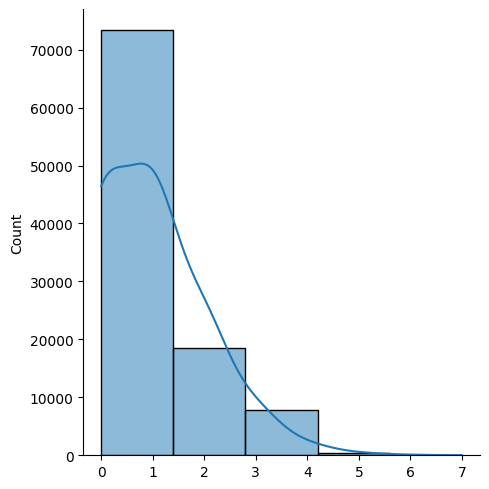

In [5]:
assessment.monte_carlo.plot_frequency()

#### Severity Graph

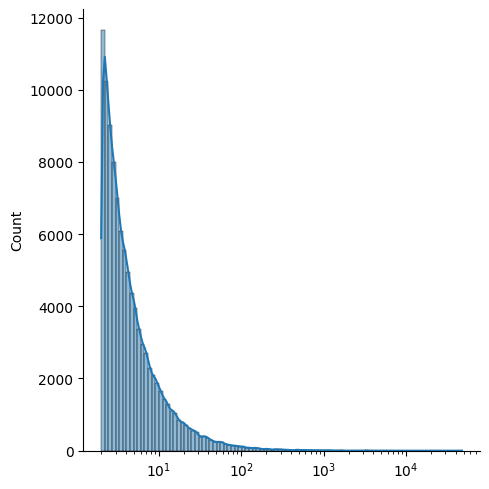

In [6]:
assessment.monte_carlo.plot_severity()

## The Basic Challenge

#### Average Loss and VaR at 99%

For the simple case of the XS contract called "10m XS 5m", we present the following metrics:

In [7]:
assessment.the_basic_challenge()

Average Loss     1.631739
VaR_99          14.558392
Name: 10m xs 5m, dtype: object

## Introducing AAD and AAL

#### Average Loss and VaR at 99% for All Types of Reinsurance Contracts

We present the average annual aggregate deductible (AAD) and average annual aggregate limit (AAL), along with the VaR at 99% for all types of reinsurance contracts considered in the assessment:

In [8]:
assessment.introducing_AAD_and_AAL()

,10m xs 5m,"10m xs 5m, AAD 2m","10m xs 5m, AAL 12m","10m xs 5m, AAD 2m, AAL 12m"
Average Loss,1.631739,1.159183,1.558919,1.11349
VaR_99,14.558392,12.558392,12.0,12.0


## Applying a Simple Pricing Model

#### Premium for All Types of Reinsurance Contracts

We present the calculated premiums for all types of reinsurance contracts considered in the assessment:

In [9]:
assessment.applying_a_simple_pricing_model()

,10m xs 5m,"10m xs 5m, AAD 2m","10m xs 5m, AAL 12m","10m xs 5m, AAD 2m, AAL 12m"
Premium,2.984425,2.389674,2.394206,1.984411


## Patterns

#### Claim Patterns of Reinsurance Contracts

We present the claim patterns observed for all types of reinsurance contracts considered in the assessment:

In [10]:
assessment.patterns()

,Pattern
10m xs 5m,"['0.237', '0.644', '0.119']"
"10m xs 5m, AAD 2m","['0.227', '0.649', '0.124']"
"10m xs 5m, AAL 12m","['0.245', '0.641', '0.114']"
"10m xs 5m, AAD 2m, AAL 12m","['0.234', '0.645', '0.120']"


## Freestyle

In this section, I began by computing the usual risk measures relevant for Solvency II and the Swiss Solvency Test using the initial single line of business and all reinsurance contract types we have. I assumed the following relevant risk measures:

- **Solvency II**: Value at Risk at 99.5% confidence level ("VaR_995")
- **Swiss Solvency Test**: Tail Value at Risk at 99% confidence level ("TVaR_99")

In [11]:
assessment.summary

,10m xs 5m,"10m xs 5m, AAD 2m","10m xs 5m, AAL 12m","10m xs 5m, AAD 2m, AAL 12m"
Average Loss,1.631739,1.159183,1.558919,1.11349
VaR_99,14.558392,12.558392,12.0,12.0
TVaR_99,18.540317,16.540317,12.0,12.0
VaR_995,18.701727,16.701727,12.0,12.0
Premium,2.984425,2.389674,2.394206,1.984411
Pattern,"['0.237', '0.644', '0.119']","['0.227', '0.649', '0.124']","['0.245', '0.641', '0.114']","['0.234', '0.645', '0.120']"


#### Portfolio Aggregation

To demonstrate advanced coding skills, I've implemented a new class that allows combining multiple lines of business. Here, I'll present an example using a portfolio composed of two lines of business: the initial one and an additional line of business. This section showcases how to leverage inheritance between classes and explores some useful dictionary techniques.

For the risk measure, I've simplified the underwriting risk example. I assume premiums are calculated similarly to the previous exercise, with zero expenses. Thus, the underwriting risk is simply the risk that premiums do not cover losses. The random variable considered is the sum of losses across all lines of business minus the sum of premiums across all lines of business. 

I've assumed the following relevant risk measures for this aggregated random variable:
- **Solvency II**: Value at Risk at the 99.5% confidence level ("VaR_995")
- **Swiss Solvency Test**: Tail Value at Risk at the 99% confidence level ("TVaR_99")

Let's begin by defining the new input set.

In [12]:
inputs_B = {
    'random_seed_value': seed,
    'number_of_simulation': number_of_simulation,
    'frequency_distribution': 'poisson',
    'frequency_parameter': {'lambda': 3},
    'severity_distribution': 'pareto',
    'severity_parameter': {'alpha': 1.5, 'theta': 1},
    'cost_of_capital': 0.08,
    'deductible': 5,
    'limit': 10,
    'AAD': 2,
    'AAL': 12,
    'claim_pattern': [0.3,0.6,0.1],
    'LOB': 'Ligne_B'
}

input_list = [inputs,inputs_B]

##### Instantiating Our Portfolio with 2 Monte Carlo Simulations for Line of Business A and B

This time, when we instantiate the `Portfolio` class, we need to pass a list of dictionaries as input:
- During instantiation, we will create a dictionary of lines of business "LOB" where each key is the name of the LOB, and the values are the `XLContract` objects also instantiated.

Let's refer to this new object simply as a portfolio.


In [13]:
portfolio = Portfolio(input_list)

##### Risk Aggregation Only Occurs When Calling the Summary Function for the Portfolio

This time, the risk aggregation is performed only when we call the summary function for the portfolio.


In [14]:
portfolio.get_portfolio_summary()

,10m xs 5m,"10m xs 5m, AAD 2m","10m xs 5m, AAL 12m","10m xs 5m, AAD 2m, AAL 12m"
TVaR_99,16.686021,14.400461,14.885022,12.194496
VaR_995,14.957797,13.885225,15.520307,12.444065


## Conclusion

Thank you for this coding exercise; it was challenging but rewarding to dive deep into the implementation with numerous Stack Overflow tabs open.

I hope you enjoy reviewing my code and I am eager to receive feedback on best practices and improvements.

I believe I would be a valuable addition to the team and I would be delighted to have the opportunity for an interview.

You can find the code separately or check the project directly on GitHub at the following link: [GitHub Project](https://github.com/rob1moz/RobinWengiAssessment.git).
